In [1]:
# IN Decision Tree; a tree like model of decisions is formed with all possible
# consequences
# Need of Data cleaning is not required in DTC
# no contraint on type of data on decision tree
# However, overfitting leads to noise amplification in model
# sometimes, it becomes difficult to work upon new test data leading to poor efficiency
# this happens due to excess of data


#Gain= Entropy(root)-Entropy(leaf)


In [2]:
import numpy as np

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv(r"D:\Py\Colab Work\ML\Decision Tree\heart.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
data.shape

(303, 14)

In [8]:
# SEx= "1" for Male
# Sex= "0" for Female
# fasting sugar fbs > 120 =1 otherwise 0
# thalach maximum heart rate received
# exang exercise induced angina (sort of heart attack) 1 --> Yes
# ca: major blood vessals 0-3
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

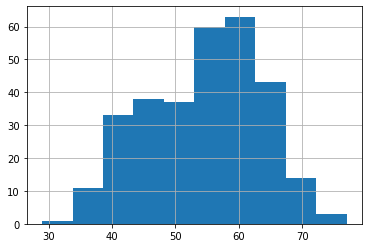

In [9]:
data["age"].hist(grid=True,bins=10)

C:\Users\Kanishu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

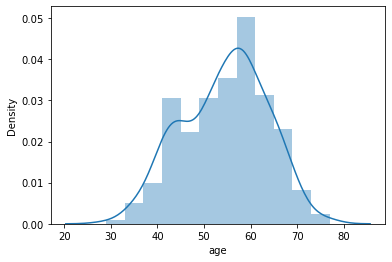

In [10]:
sns.distplot(data["age"])

In [11]:
data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [12]:
data.count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

Text(0.5, 1.0, 'count of target features by sex')

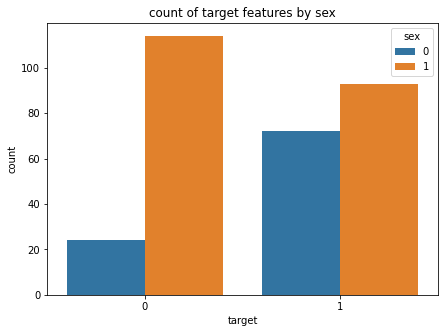

In [13]:
plt.rcParams['figure.figsize']=(7,5)
sns.countplot(x='target',hue='sex',data=data)
plt.title('count of target features by sex')

This indicates that the count of healthy males is more than unhhealthy.

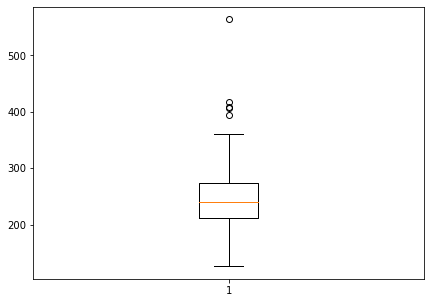

{'whiskers': [<matplotlib.lines.Line2D at 0x200a6782d90>,
 'caps': [<matplotlib.lines.Line2D at 0x200a6790370>,
 'boxes': [<matplotlib.lines.Line2D at 0x200a6782ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x200a6790910>],
 'fliers': [<matplotlib.lines.Line2D at 0x200a6790be0>],
 'means': []}

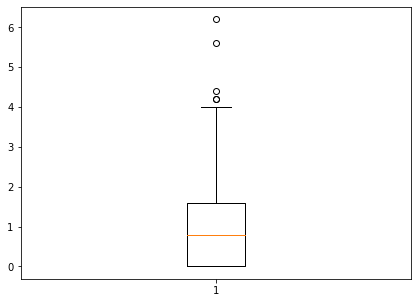

In [14]:
plt.boxplot(data['chol'])
plt.show()
plt.boxplot(data['oldpeak'])


These two are having outliers which may be rremoved. But here we shall move further along with them

In [15]:
# Model Building
x=data.iloc[:,:-1]
y=data['target']

In [16]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [18]:
from sklearn import tree


In [19]:
dtc=tree.DecisionTreeClassifier()

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=None)

In [21]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
y_pred=dtc.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [24]:
accuracy_score(y_test,y_pred)

0.7252747252747253

In [25]:
print(confusion_matrix(y_test,y_pred))

[[30 14]
 [11 36]]


In [26]:
dep=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]
for i in dep:
    dtc=tree.DecisionTreeClassifier(max_depth=i)
    dtc.fit(x_train,y_train)
    y_pred=dtc.predict(x_test)
    print("the accuracy with depth=",i, "is", accuracy_score(y_test,y_pred))
    
    

the accuracy with depth= 1 is 0.7252747252747253
the accuracy with depth= 2 is 0.7362637362637363
the accuracy with depth= 3 is 0.8021978021978022
the accuracy with depth= 4 is 0.7472527472527473
the accuracy with depth= 5 is 0.7362637362637363
the accuracy with depth= 6 is 0.7362637362637363
the accuracy with depth= 7 is 0.7252747252747253
the accuracy with depth= 8 is 0.6813186813186813
the accuracy with depth= 9 is 0.7142857142857143
the accuracy with depth= 10 is 0.7472527472527473
the accuracy with depth= 11 is 0.7252747252747253
the accuracy with depth= 12 is 0.7142857142857143
the accuracy with depth= 13 is 0.7032967032967034
the accuracy with depth= 14 is 0.6813186813186813


In [27]:
dep=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]
a=[]
for i in dep:
    dtc=tree.DecisionTreeClassifier(max_depth=i)
    dtc.fit(x_train,y_train)
    y_pred=dtc.predict(x_test)
    a.append(accuracy_score(y_test,y_pred))
    
pd.DataFrame({"Depth":dep,"Accuracy":a})

,Depth,Accuracy
0,1,0.725275
1,2,0.736264
2,3,0.802198
3,4,0.747253
4,5,0.769231
5,6,0.758242
6,7,0.725275
7,8,0.747253
8,9,0.714286
9,10,0.692308


[Text(0.5480769230769231, 0.95, 'cp <= 0.5\ngini = 0.494\nsamples = 212\nvalue = [94, 118]\nclass = a'),
 Text(0.30128205128205127, 0.85, 'ca <= 0.5\ngini = 0.402\nsamples = 104\nvalue = [75, 29]\nclass = t'),
 Text(0.19230769230769232, 0.75, 'thal <= 2.5\ngini = 0.499\nsamples = 50\nvalue = [24, 26]\nclass = a'),
 Text(0.10256410256410256, 0.65, 'exang <= 0.5\ngini = 0.366\nsamples = 29\nvalue = [7, 22]\nclass = a'),
 Text(0.05128205128205128, 0.55, 'chol <= 316.5\ngini = 0.105\nsamples = 18\nvalue = [1, 17]\nclass = a'),
 Text(0.02564102564102564, 0.45, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]\nclass = a'),
 Text(0.07692307692307693, 0.45, 'slope <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = t'),
 Text(0.05128205128205128, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = a'),
 Text(0.10256410256410256, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = t'),
 Text(0.15384615384615385, 0.55, 'restecg <= 0.5\ngini = 0.496\nsamples = 11\nvalue = [6, 5]\nclass = t

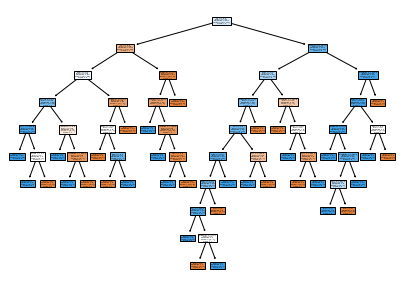

In [31]:
tree.plot_tree(dtc,feature_names=x.columns,class_names='target',filled=True)